In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
print(mpl.style.available)
mpl.style.use('fivethirtyeight')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
file_path = '911.csv'
data = pd.read_csv(file_path, parse_dates=['timeStamp'], infer_datetime_format=True)
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
np.max(data['timeStamp'])

Timestamp('2020-06-08 13:14:43')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645716 entries, 0 to 645715
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        645716 non-null  float64       
 1   lng        645716 non-null  float64       
 2   desc       645716 non-null  object        
 3   zip        567493 non-null  float64       
 4   title      645716 non-null  object        
 5   timeStamp  645716 non-null  datetime64[ns]
 6   twp        645434 non-null  object        
 7   addr       645716 non-null  object        
 8   e          645716 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 44.3+ MB


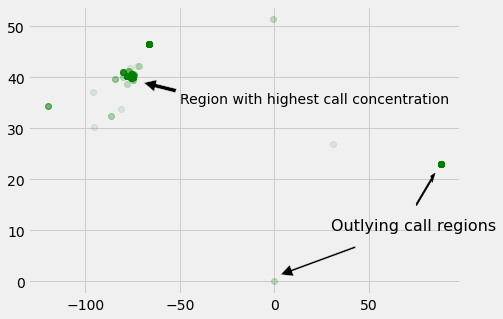

In [6]:
figure = plt.Figure()
axes = figure.add_axes((0, 0, 1.0, 1.0))
axes.plot('lng', 'lat', 'go', data=data, alpha=.1)
axes.annotate('Region with highest call concentration', xy=(-70, 39), xytext=(-50, 35),
              arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)
axes.text(30, 10, 'Outlying call regions', fontsize=16)
# axes.annotate('', xy=(70, 20), arrowprops=dict(facecolor='black', shrink=0.05))
# axes.annotate('', xy=())
axes.arrow(75, 15, 8, 5, width=.5, color='black')
axes.annotate("", xy=(1, 1), xytext=(45, 7),
            arrowprops=dict(facecolor='black', shrink=0.05, width=2))
figure

From the above plot most of the calls from the dataset are concentrated around an area, too close together to be able to tell the town apart

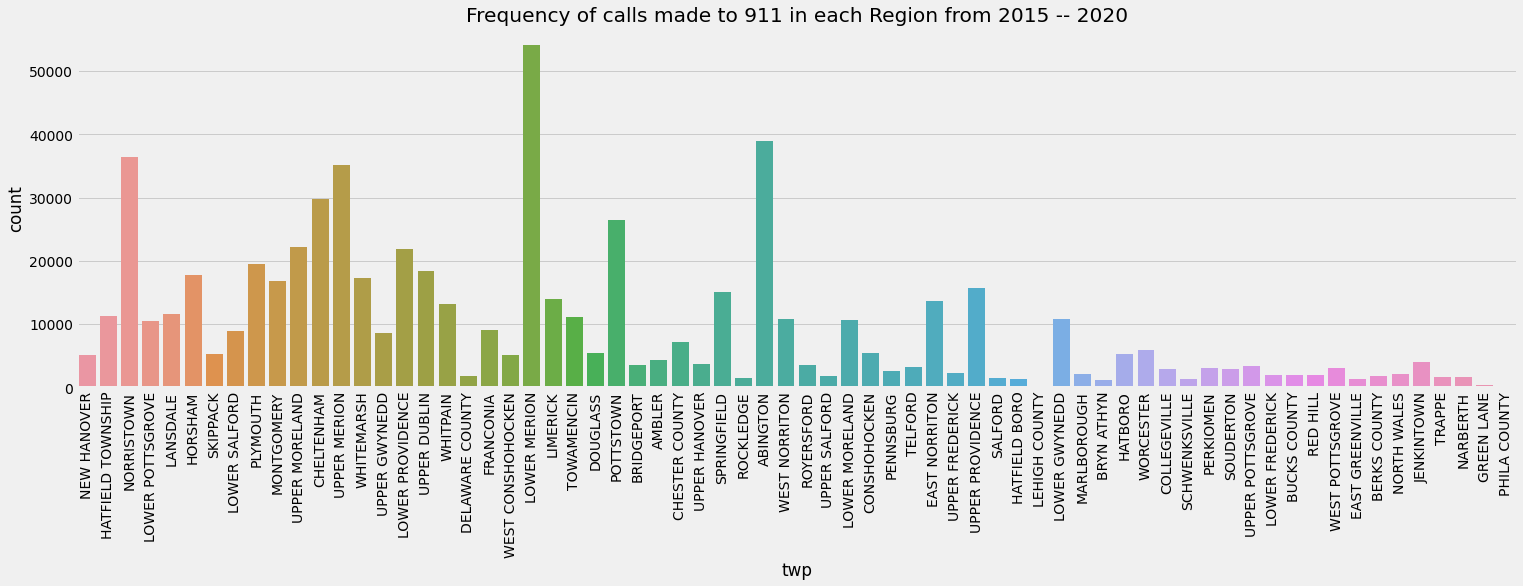

In [7]:
with plt.style.context('fivethirtyeight'):
    fig = plt.Figure(figsize=(20, 5))
    ax = fig.add_axes((0, 0, 1, 1))
    ax.set_title('Frequency of calls made to 911 in each Region from 2015 -- 2020')
    x_ticks = ax.get_xticklabels()
    plt.setp(x_ticks, rotation=90)
    sns.countplot(x='twp', data=data, ax=ax)
fig

From the above plot we can see regions we can say are relatively accident-free or threat-free due to the low number of calls made to 911 from those regions. So a recommendation system could be built recommending those regions of safety if security is a prominent criteria

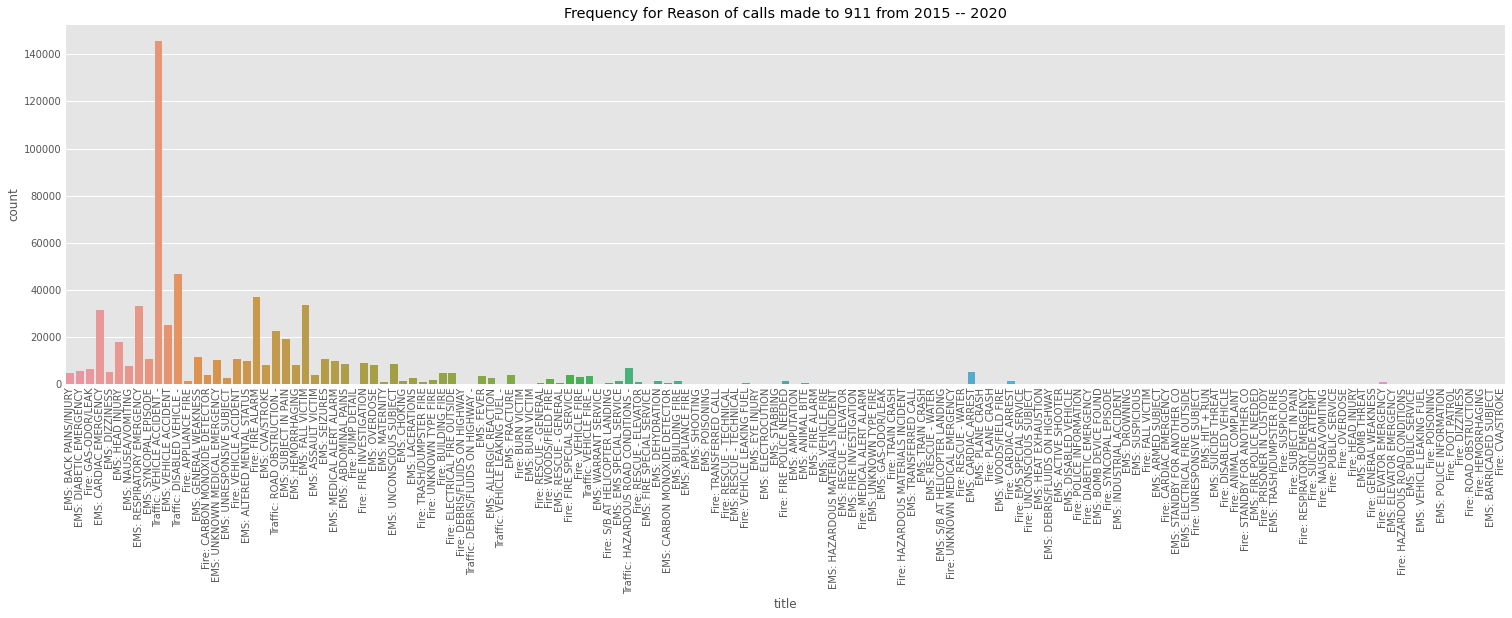

In [8]:
with plt.style.context('ggplot'):
    fig = plt.Figure(figsize=(20, 5))
    ax = fig.add_axes((0, 0, 1, 1))
    ax.set_title('Frequency for Reason of calls made to 911 from 2015 -- 2020')
    ax.set_xlabel('What are people calling the 911 for?')
    x_ticks = ax.get_xticklabels()
    plt.setp(x_ticks, rotation=90)
    sns.countplot(x='title', data=data, ax=ax)
fig

Majority of the calls made where about Traffic vehicle accident, here a list of the top five most frequent calls made
* Traffic Vehicle accident
* Traffic Disabled vehicle
* Fire Alarm
* Fall victim
* Respiratory emergency

We are going to be focusing on subset of the data, which are on calls made about Traffic vehicle accident

In [9]:
veh_acc = data.loc[data['title'] == 'Traffic: VEHICLE ACCIDENT -']

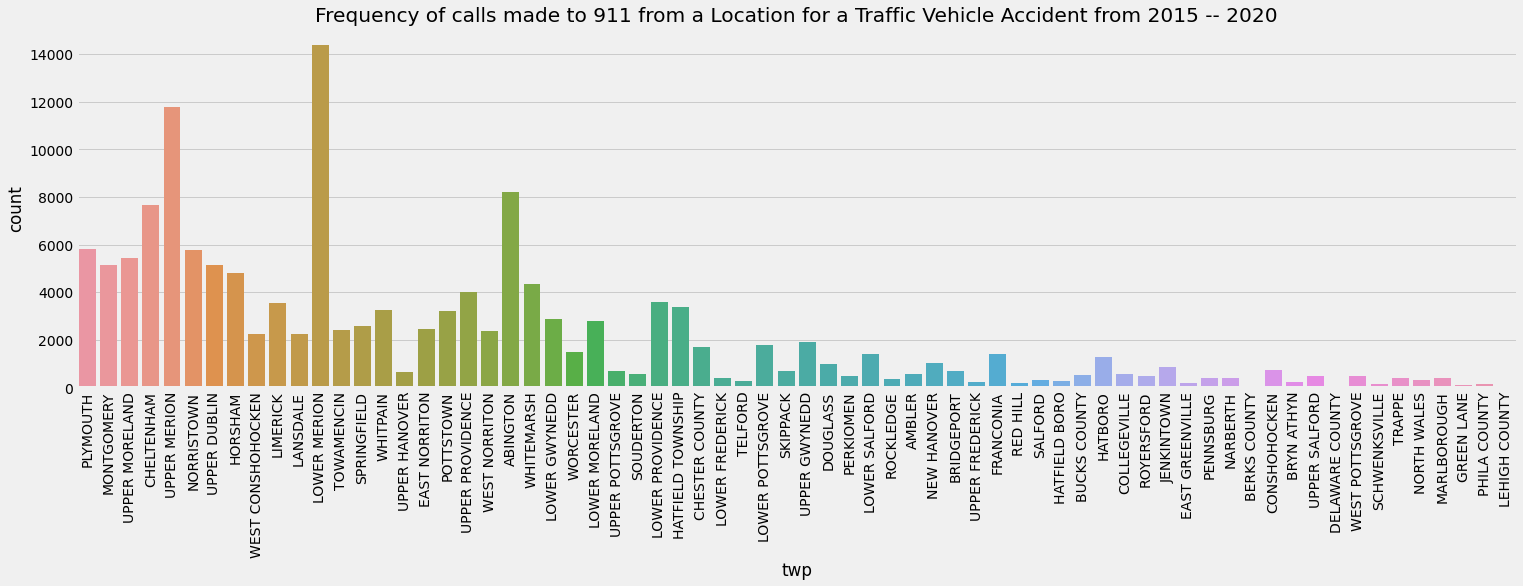

In [10]:
fig = plt.Figure(figsize=(20, 5))
ax = fig.add_axes((0, 0, 1, 1))
ax.set_title('Frequency of calls made to 911 from a Location for a Traffic Vehicle Accident from 2015 -- 2020')
x_ticks = ax.get_xticklabels()
plt.setp(x_ticks, rotation=90)
sns.countplot(x='twp', data=veh_acc, ax=ax)
fig

This subset of data correlate with the total data, It looks like the highest number of calls made to 911 was about vehicle accidents, and most of those calls was made from Lower Merion and the next from Upper Merion, suffice it to say, Lower Merion has the highest accident rate from 2015 - 2020. In summary, Lower Merion has the highest call traffic to 911, and without any doubt most of those calls made to 911 were about Vehicle accident, prove of which we will soon see

In [11]:
# Gather dataset of calls made only from Lower Merion
lower_merion = data.loc[data['twp'] == 'LOWER MERION']
lower_merion.shape

(54204, 9)

Text(0.5, 1.0, 'Percentage of Calls made in Lower Merion to 911 for a Reason from 2015 - 2020')

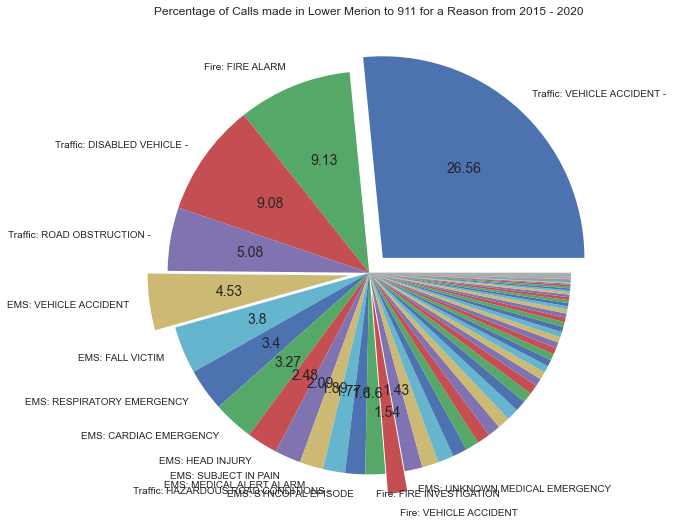

In [12]:
def display_percentage(x):
    """display only the percentage of the pie above the threshold"""
    if x < 1.4:
        return ''
    else:
        return np.round(x, decimals=2)
    
mpl.style.use('seaborn')
labels, values = dict(lower_merion['title'].value_counts()).keys(), dict(lower_merion['title'].value_counts()).values()
# format the labels to properly displayed on the chart
labels = [x if percentage > 1.4 else '' for x, percentage in zip(labels, (list(values) / sum(list(values))) * 100)]

explode_array = [0.1 if 'vehicle accident' in x.lower() else 0 for x in labels]

fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0, 0, 1, 1])
axes, texts, _ = ax.pie(values, explode=explode_array, labels=labels, autopct=display_percentage)
ax.set_title('Percentage of Calls made in Lower Merion to 911 for a Reason from 2015 - 2020')

If we add all the calls attributed to vehicle accidents which are:
* Traffic: VEHICLE ACCIDENT  (26.56%)
* EMS: VEHICLE ACCIDENT  (4.53%)
* Fire: VEHICLE ACCIDENT  (1.54%)  Total 32.63%
Then almost a quarter of the calls made to 911 from 2015 - 2020 in Lower Merion alone were because of Vehicle accident, and It will be more if Upper Merion was added to the analysis. Therefore security and emergency services should be on the high alert for vehicle related accident much more than any other 

#### NOTE: This might not be the case for other other regions, but this is certainly the case for Lower Merion 


This analysis can be easily deduced by anyone who just look at the data. And it does not answer crucial and more specific questions, questions like;
* At what time of the day do this accident tends to happen (Morning, Afternoon or Evening)
* Do this accident occurs more often during the festive seasons (Christmas, Easter, etc.)


Answers to these questions will enable various agencies to better able planned to manage such crises in time, therefore saving more lifes

We will approach this answers indirectly, we will first look at how many calls in general were made each month to 911 and at what point in time, before we go specifically into Vehicle accident and also using Lower Merion as a test case

Text(0.5, 1.0, 'No of calls made in each year from 2015 - 2020')

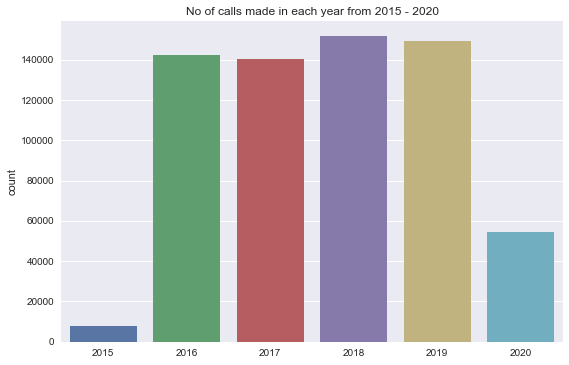

In [13]:
# plot the number of calls made to 911 each month irrespective of which incident
# Which year experienced the highest calls made from 2015-2020
year_calls_made = [date.year for date in data['timeStamp']]
sns.countplot(x=year_calls_made)
plt.title('No of calls made in each year from 2015 - 2020')

Not surprising since the data time series was from Thurs 10 Dec 2015 to Mon 8 June 2020, so those two different years will have much fewer calls made than the others. With the other years having roughly equal calls made in it

Text(0.5, 1.0, 'No of calls made in each month during the years regardless of incident')

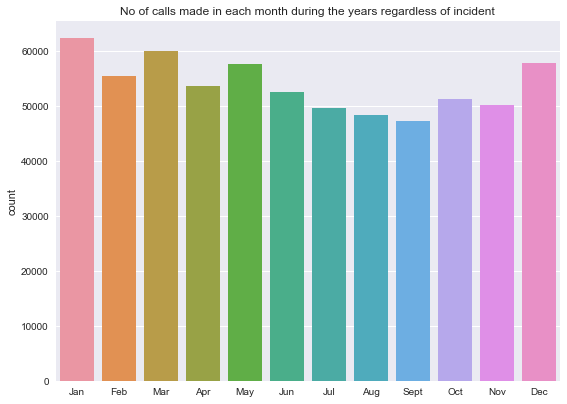

In [14]:
month_calls_made = [date.month for date in data['timeStamp']]
fig = plt.figure(figsize=(7, 5))
ax = fig.add_axes([0, 0, 1, 1])
sns.countplot(x=month_calls_made, ax=ax)

ax.set_xticklabels([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'
])
plt.title('No of calls made in each month during the years regardless of incident')

During 2015 - 2020 much calls was made on the month of Jan, March and Dec to 911 regardless of situation. From this we could say calls to 911 tends to happens more on January than it any other month and least in Sept than in any other month

But this dataset is an imbalanced, because some months are missing in 2015 and 2020. So to create a more balanced dataset in order to expect a more generalistic representation, we are going to use only a subsets of the dataset containing years from 2016 - 2019.

In [15]:
# selecting every calls made from 2016 to 2019
data_balanced = data[(data['timeStamp'] >= pd.Timestamp(day=1, month=1, year=2016)) & (data['timeStamp'] <= pd.Timestamp(day=31, month=12, year=2019))]

Text(0.5, 1.0, 'Number of calls made in each year from 2016 - 2019 (Balanced Dataset)')

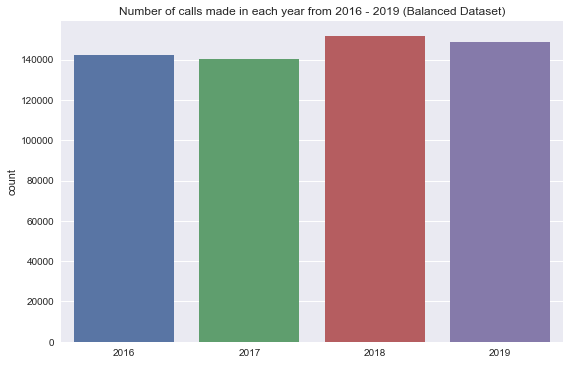

In [16]:
# plot the number of calls made to 911 each month irrespective of which incident
# Which year experienced the highest calls made from 2015-2020
year_calls_made = [date.year for date in data_balanced['timeStamp']]
sns.countplot(x=year_calls_made)
plt.title('Number of calls made in each year from 2016 - 2019 (Balanced Dataset)')

Text(0.5, 1.0, 'No of calls made in each month during the years regardless of incident from 2016 - 2019')

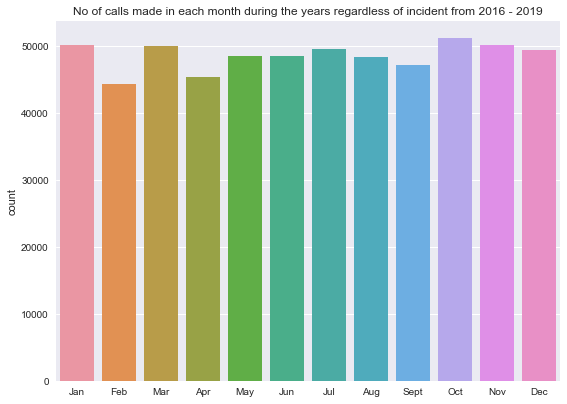

In [17]:
month_calls_made = [date.month for date in data_balanced['timeStamp']]
fig = plt.figure(figsize=(7, 5))
ax = fig.add_axes([0, 0, 1, 1])
sns.countplot(x=month_calls_made, ax=ax)

ax.set_xticklabels([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'
])
plt.title('No of calls made in each month during the years regardless of incident from 2016 - 2019')

This plot show the true distribution of the calls made to 911 in each month during the four years period. With the total number of calls made is higher during the beginning and towards the ending of each year and the least in Februar. 

#### Note: This might not always been the case in each of the year, as February might not have the least calls made in a particular year or January having the most calls made each year. It only apply when they are all totaled 

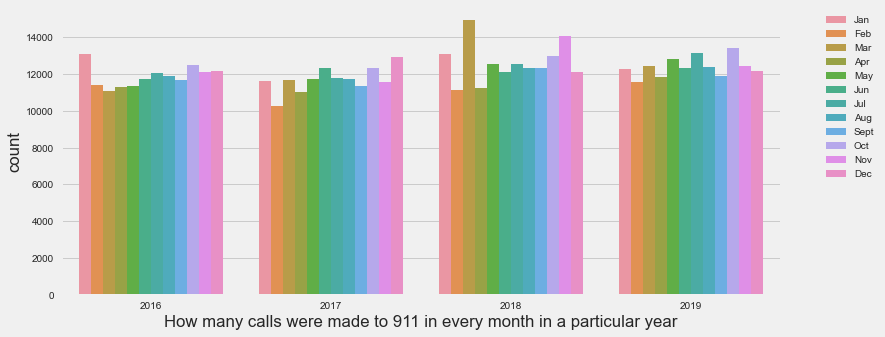

In [18]:
# month_calls_made = [date.month for date in data['timeStamp']]
mpl.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0, 0, 1, 1])
sns.countplot(x=year_calls_made, hue=month_calls_made, ax=ax)
ax.set_xlabel("How many calls were made to 911 in every month in a particular year")
# ax.text(3, 23, 'love')
# plt.title('No of calls made in each month of each year regardless of incident')
plt.legend(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], bbox_to_anchor=(1.05, 1), loc=2)

Insight from the above plot:
* In 2016 most calls was made in Janaury, with the least in March
* In 2017 most calls was made in Decemeber, with the least in Feburary
* In 2018 most calls was made in March, with the least in Feburary
* In 2019 most calls was made in October, with the least in Feburary

The above plot can also be view in a different or opposite way; seeing the number of calls made in each year of different month. For example 'In the month of February how many calls was made in each year at this particular month

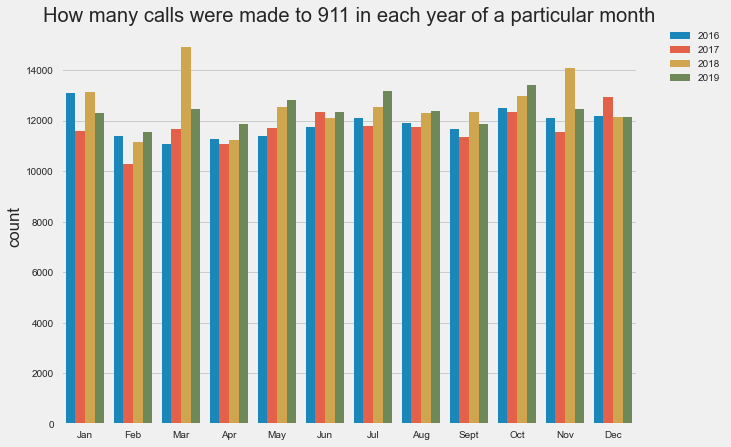

In [19]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
sns.countplot(x=month_calls_made, hue=year_calls_made, ax=ax)
ax.set_xticklabels([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'
])
ax.set_title('How many calls were made to 911 in each year of a particular month')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Now drawing our attention back to our focus on vehicle accident, we are going to repeat our analysis to see if the rate of vehicle accident in this new balanced dataset will still have the same overwhelming impact as it did in the unbalanced dataset

In [20]:
veh_acc_balanced = data_balanced.loc[data_balanced['title'] == 'Traffic: VEHICLE ACCIDENT -']

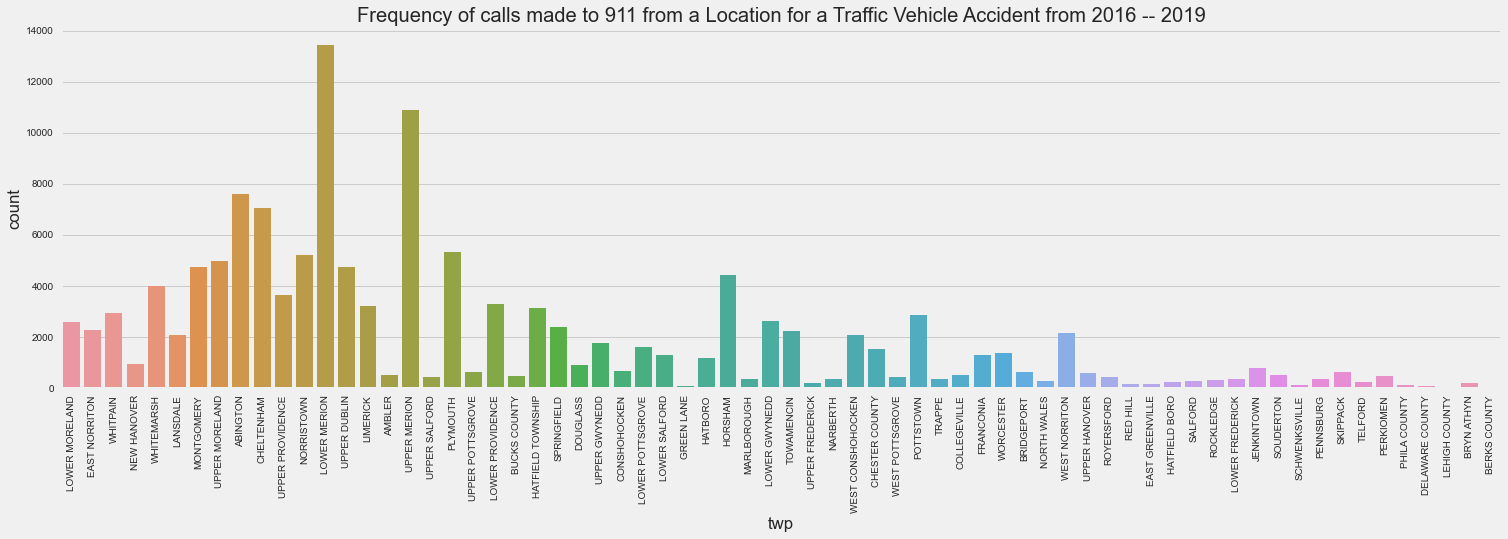

In [216]:
fig = plt.Figure(figsize=(20, 5))
ax = fig.add_axes((0, 0, 1, 1))
ax.set_title('Frequency of calls made to 911 from a Location for a Traffic Vehicle Accident from 2016 -- 2019')
x_ticks = ax.get_xticklabels()
plt.setp(x_ticks, rotation=90)
sns.countplot(x='twp', data=veh_acc_balanced, ax=ax)
fig

In [22]:
# Gather dataset of calls made only from Lower Merion
lower_merion_balanced = data_balanced.loc[data_balanced['twp'] == 'LOWER MERION']
lower_merion_balanced.shape

(49535, 9)

Text(0.5, 1.0, 'Percentage of Calls made in Lower Merion to 911 for a Reason from 2016 - 2019')

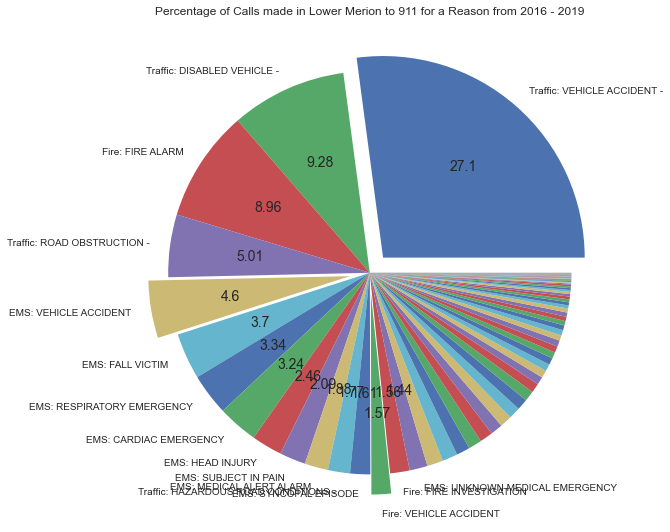

In [23]:
mpl.style.use('seaborn')
labels, values = dict(lower_merion_balanced['title'].value_counts()).keys(), dict(lower_merion_balanced['title'].value_counts()).values()
# format the labels to properly displayed on the chart
labels = [x if percentage > 1.4 else '' for x, percentage in zip(labels, (list(values) / sum(list(values))) * 100)]

explode_array = [0.1 if 'vehicle accident' in x.lower() else 0 for x in labels]

fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0, 0, 1, 1])
axes, texts, _ = ax.pie(values, explode=explode_array, labels=labels, autopct=display_percentage)
ax.set_title('Percentage of Calls made in Lower Merion to 911 for a Reason from 2016 - 2019')

If anything there is an increase in the percentage of calls about vehicle accident made to 911

### Now what do we know so far?
* Most of the calls made to 911 were about vehicle accident
* Most of the calls made were from Lower and Upper Merion
* Also the calls made from Lower Merion was mostly about Vehicle accident which constitute almost a quarter of the total calls made

* The 2018 has the highest number of calls made, and 2017 the lowest
* The highest number of calls are made on the beginning and ending of each year
* Febraury is the month where the least number of calls are made to 911


#### What Next?
We are going to answer more specific questions, while focusing on vehicle accident in Lower Merion. Questions like;
* Which year has the highest calls about vehicle accident
* Which month experiences more calls made to 911 about vehicle accident
* Which day of the week do they most often make this calls

In [24]:
# retrieved on the calls made to 911 from Lower Merion for vehicle accident 
lower_merion_vehicle_accident_balanced = lower_merion_balanced[lower_merion_balanced['title'] == 'Traffic: VEHICLE ACCIDENT -']
lower_merion_vehicle_accident_balanced

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
8079,40.017584,-75.303090,W MONTGOMERY AVE & BOOTH LN; LOWER MERION; 201...,19041.0,Traffic: VEHICLE ACCIDENT -,2016-01-01 15:40:13,LOWER MERION,W MONTGOMERY AVE & BOOTH LN,1
8218,40.026899,-75.234430,PRICE ST & FAIRVIEW AVE; LOWER MERION; 2016-01...,19004.0,Traffic: VEHICLE ACCIDENT -,2016-01-02 06:28:00,LOWER MERION,PRICE ST & FAIRVIEW AVE,1
8322,40.004556,-75.284357,LANCASTER AVE & CHATHAM RD; LOWER MERION; 2016...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-01-02 13:22:11,LOWER MERION,LANCASTER AVE & CHATHAM RD,1
8345,40.015471,-75.305895,W LANCASTER AVE & BUCK LN; LOWER MERION; 2016-...,19041.0,Traffic: VEHICLE ACCIDENT -,2016-01-02 14:35:20,LOWER MERION,W LANCASTER AVE & BUCK LN,1
8388,40.024967,-75.282905,SCHUYLKILL EXPY & RIGHTERS FERRY RD UNDERPASS;...,NaN,Traffic: VEHICLE ACCIDENT -,2016-01-02 16:47:50,LOWER MERION,SCHUYLKILL EXPY & RIGHTERS FERRY RD UNDERPASS,1
...,...,...,...,...,...,...,...,...,...
590575,40.013856,-75.227959,SCHUYLKILL EXPY & RAMP I76 WB TO BELMONT AVE; ...,19004.0,Traffic: VEHICLE ACCIDENT -,2019-12-30 08:21:27,LOWER MERION,SCHUYLKILL EXPY & RAMP I76 WB TO BELMONT AVE,1
590802,40.031283,-75.269216,CONSHOHOCKEN STATE RD & MILL CREEK RD; LOWER M...,19035.0,Traffic: VEHICLE ACCIDENT -,2019-12-30 17:42:33,LOWER MERION,CONSHOHOCKEN STATE RD & MILL CREEK RD,1
590839,40.000163,-75.228718,W CITY AVE & BALA AVE; LOWER MERION; 2019-12-3...,19131.0,Traffic: VEHICLE ACCIDENT -,2019-12-30 19:05:57,LOWER MERION,W CITY AVE & BALA AVE,1
590866,40.000163,-75.228718,W CITY AVE & BALA AVE; LOWER MERION; 2019-12-3...,19131.0,Traffic: VEHICLE ACCIDENT -,2019-12-30 20:30:41,LOWER MERION,W CITY AVE & BALA AVE,1


In [25]:
year_calls_made_lower_merion_vehicle_accident_balanced = [date.year for date in lower_merion_vehicle_accident_balanced['timeStamp']]
month_calls_made_lower_merion_vehicle_accident_balanced = [date.month for date in lower_merion_vehicle_accident_balanced['timeStamp']]

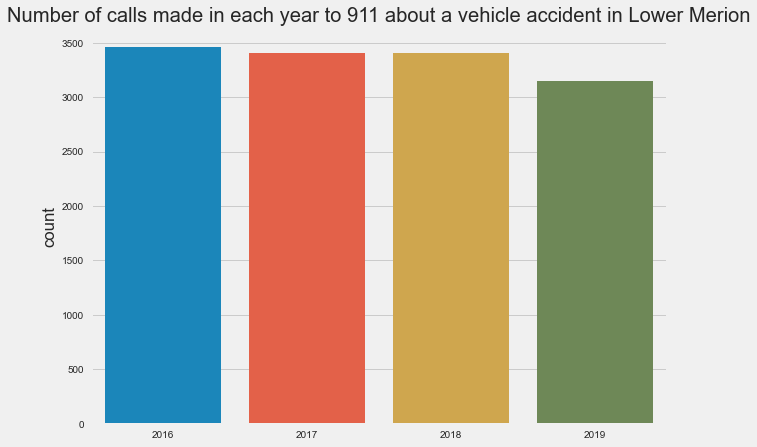

In [39]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Number of calls made in each year to 911 about a vehicle accident in Lower Merion")
sns.countplot(x=year_calls_made_lower_merion_vehicle_accident_balanced, ax=ax)

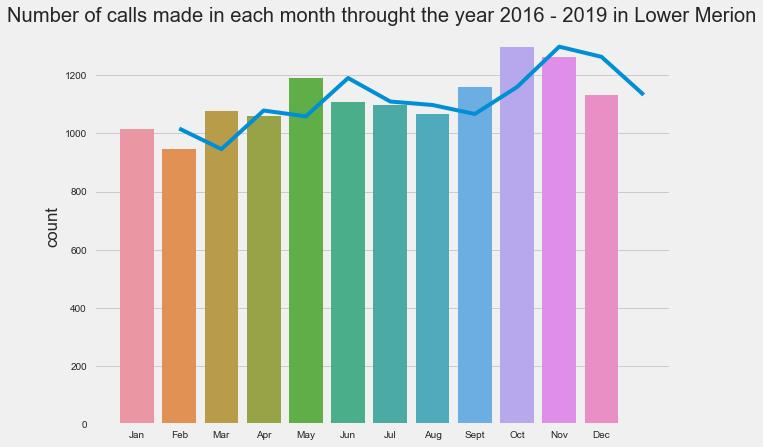

In [46]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Number of calls made in each month throught the year 2016 - 2019 in Lower Merion")
sns.countplot(x=month_calls_made_lower_merion_vehicle_accident_balanced, ax=ax)
ax.set_xticklabels([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'
])

x, y = np.unique(month_calls_made_lower_merion_vehicle_accident_balanced, return_counts=True)
sns.lineplot(x=x, y=y, ax=ax)

As you can see regardless of which year, calls made to 911 tends to increase going down the year, i.e., more calls are made during the ending of the year than at the beginning

In [101]:
day_calls_made_lower_merion_vehicle_accident_balanced = [date.day_name() for date in lower_merion_vehicle_accident_balanced['timeStamp']]

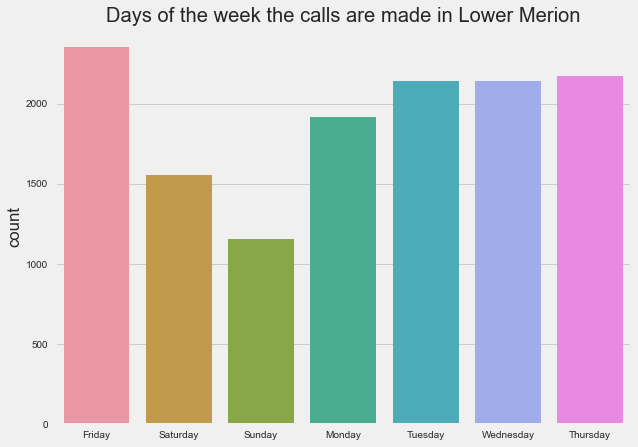

In [110]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Days of the week the calls are made in Lower Merion")
sns.countplot(x=day_calls_made_lower_merion_vehicle_accident_balanced, ax=ax)


As displayed in the above plot, most accident happens during friday which is the end of work days for most people and least accident happens during the weekends when most people are at home with their families. It experience a very sharp increase on Mondays and tends to slightly rise through the week day (I guess with rising fraustration at work) and climax at Friday. A lot of information is been revealed in this plots, let take it a bit further and see at what time in the day do this accidents tends to mostly happen (Mornings, Afternoon or Night)?

Text(14, 1300, 'Work closing hour')

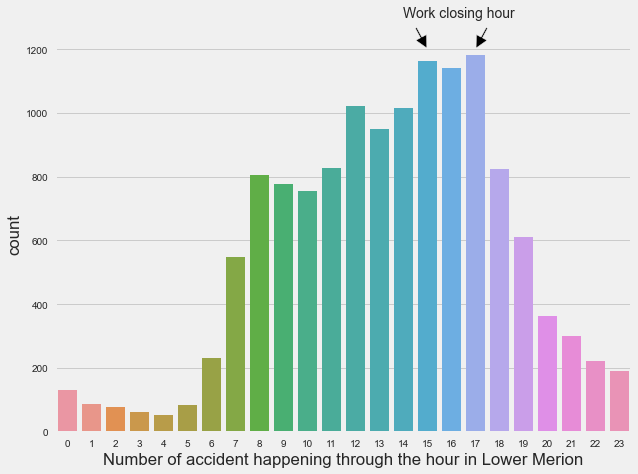

In [211]:
hour_calls_made_lower_merion_vehicle_accident_balanced = [date.hour for date in lower_merion_vehicle_accident_balanced['timeStamp']]
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel('Number of accident happening through the hour in Lower Merion')

sns.countplot(x=hour_calls_made_lower_merion_vehicle_accident_balanced, ax=ax)

ax.annotate('', xy=(15, 1200), xytext=(14.5, 1270),
          arrowprops=dict(facecolor='black', shrink=0.05, width=1.5), fontsize=14)
ax.annotate('', xy=(17, 1200), xytext=(17.5, 1270), 
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5), fontsize=14)
ax.text(14, 1300, 'Work closing hour', fontsize=14)

To compress the hours further into day AM and PM

Text(0.5, 1.0, 'The number of calls made at AM and PM from Lower Merion')

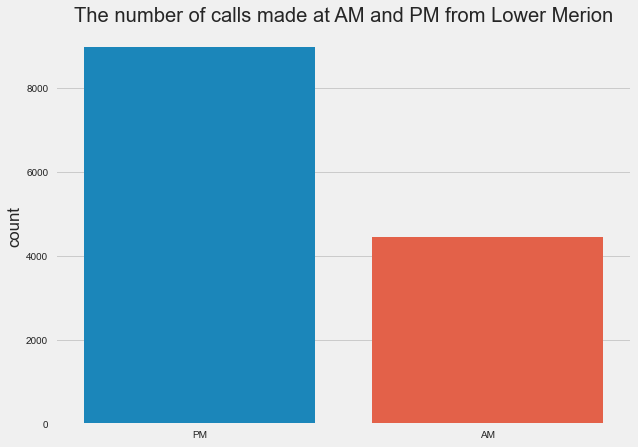

In [242]:
day_night = [date.strftime('%p') for date in lower_merion_vehicle_accident_balanced['timeStamp']]
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

sns.countplot(x=day_night, ax=ax)
ax.set_title("The number of calls made at AM and PM from Lower Merion")

### Conclusion
From this analysis, we can conclude namely that;
* Vehicle accident rank the highest reported incident
* The highest Vehicle reported accident was made from Lower Merion followed by Upper Merion
* Vehicle accident reported incident constitute about a quarter of all incident reported in Lower Merion
* 2016 was the highest reported incident of vehicle accident in Lower Merion and has been on a slight decrease over the past three years
* There is an increase in the number of reported incident toward the ending and begining of each year in Lower Merion
* Of the days of the week, Fridays have the highest number of reported vehicle accident in every month, year, with sunday having the least reported vehicle incident in Lower Merion
* Most of the vehicle accident happens from 7am to 6pm, with a sharp increase in the accident from 3pm to 5pm and a corresponding more sharper decrease from 6pm in Lower Merion
* Or you could say more vehicle accident happens in the PM than in the AM in Lower Merion

With this format, one can also perform in-depth analysis on any other reported incident and create a model capable of generalizing